<a href="https://colab.research.google.com/github/UrmishaPal/ML-models/blob/main/Linear_Regression_with_Python_of_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Failure**

In [ ]:
import kagglehub
import pandas as pd
from pathlib import Path

# Download latest version
path = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")

# Assuming the dataset contains a CSV file, load it into a DataFrame
df = pd.read_csv(Path(path) / 'heart_failure_clinical_records_dataset.csv')
display(df.head())

Using Colab cache for faster access to the 'heart-failure-clinical-data' dataset.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import kagglehub
from pathlib import Path

# Download latest version to define 'path'
path = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")

df = pd.read_csv(Path(path) / 'heart_failure_clinical_records_dataset.csv')

Using Colab cache for faster access to the 'heart-failure-clinical-data' dataset.


In [12]:
import pandas as pd
from pathlib import Path

df = pd.read_csv(Path(path) / 'heart_failure_clinical_records_dataset.csv')

In [9]:
display(df.head())

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# **EDA**

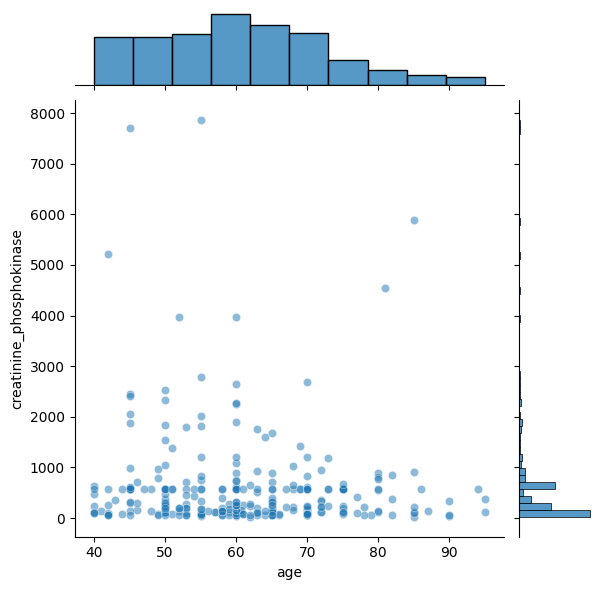

In [18]:
sns.jointplot(x='age', y='creatinine_phosphokinase', data=df, alpha=0.5)

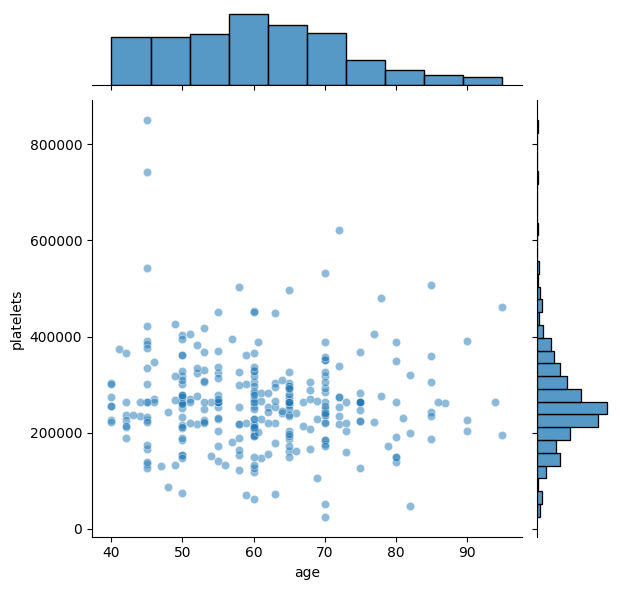

In [17]:
sns.jointplot(x='age', y='platelets', data=df, alpha=0.5)

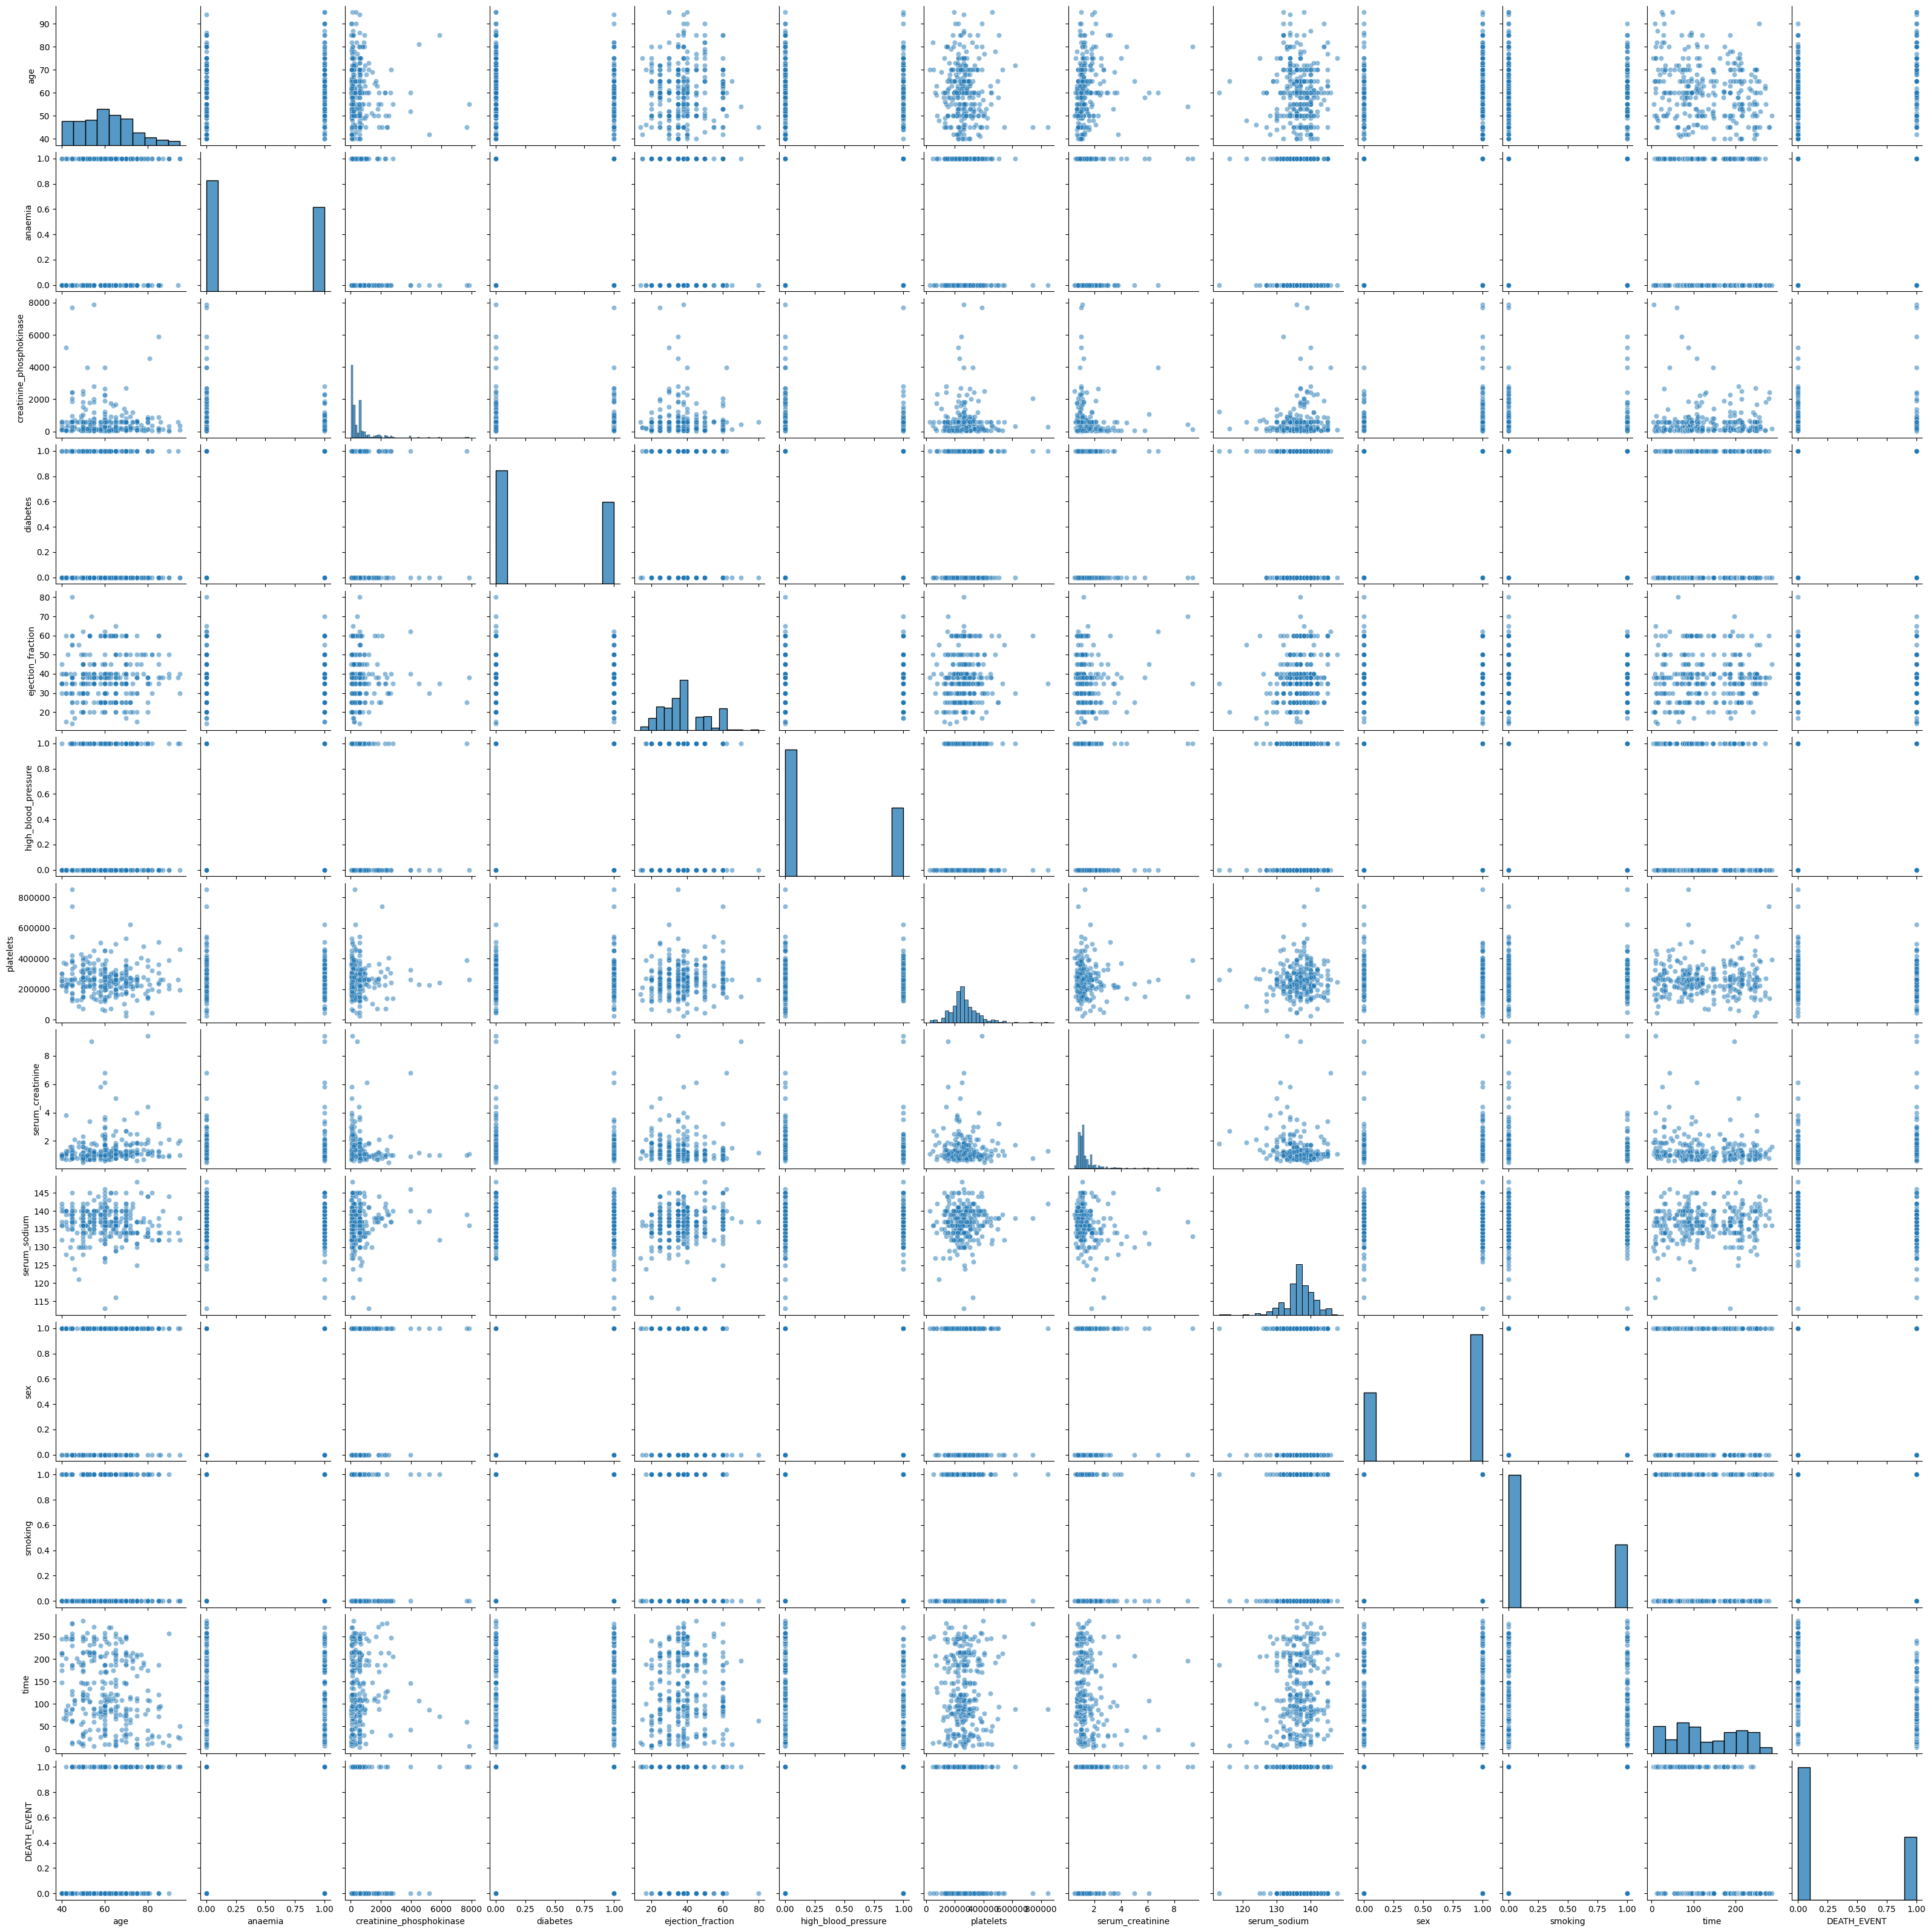

In [19]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.5})

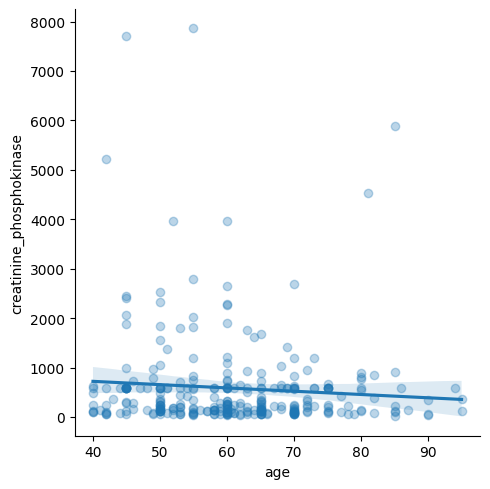

In [22]:
sns.lmplot(x= 'age', y= 'creatinine_phosphokinase', data=df, scatter_kws={'alpha':0.3})

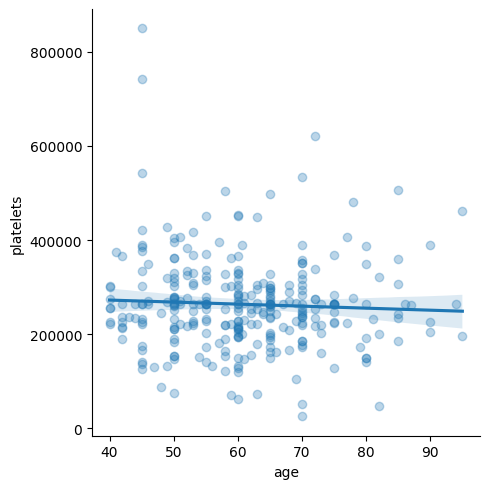

In [24]:
sns.lmplot(x= 'age', y= 'platelets', data=df, scatter_kws={'alpha':0.3})

In [25]:
from sklearn.model_selection import train_test_split

In [34]:
x=df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
y=df['DEATH_EVENT']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
x_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
224,58.000,582,25,504000.00,1.0,138,205
68,70.000,161,25,244000.00,1.2,142,66
222,42.000,86,35,365000.00,1.1,139,201
37,82.000,855,50,321000.00,1.0,145,30
16,87.000,149,38,262000.00,0.9,140,14
...,...,...,...,...,...,...,...
188,60.667,151,40,201000.00,1.0,136,172
71,58.000,582,35,122000.00,0.9,139,71
106,55.000,748,45,263000.00,1.3,137,88
270,44.000,582,30,263358.03,1.6,130,244


In [37]:
x_test

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
281,70.0,582,40,51000.00,2.70,136,250
265,50.0,298,35,362000.00,0.90,140,240
164,45.0,2442,30,334000.00,1.10,139,129
9,80.0,123,35,388000.00,9.40,133,10
77,42.0,102,40,237000.00,1.20,140,74
...,...,...,...,...,...,...,...
132,46.0,719,40,263358.03,1.18,137,107
72,85.0,5882,35,243000.00,1.00,132,72
15,82.0,379,50,47000.00,1.30,136,13
10,75.0,81,38,368000.00,4.00,131,10


In [38]:
y_train

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1
...,...
188,0
71,0
106,0
270,0


In [39]:
y_test

,DEATH_EVENT
281,0
265,0
164,1
9,1
77,0
...,...
132,0
72,1
15,1
10,1


# ***Training the model***

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm=LinearRegression()

In [45]:
lm.fit(x_train, y_train)

LinearRegression()

In [47]:
lm.coef_

array([ 6.20748957e-03,  2.72985432e-06, -8.87245266e-03, -4.75200775e-08,
        1.20130547e-01, -3.84719474e-03, -2.58896301e-03])

In [48]:
cdf=pd.DataFrame(lm.coef_, x.columns, columns=['Coef'])

In [49]:
print(cdf)

                                  Coef
age                       6.207490e-03
creatinine_phosphokinase  2.729854e-06
ejection_fraction        -8.872453e-03
platelets                -4.752008e-08
serum_creatinine          1.201305e-01
serum_sodium             -3.847195e-03
time                     -2.588963e-03


#  ***predictions***

In [50]:
predictions=lm.predict(x_test)

In [51]:
predictions

array([ 0.19625639, -0.1048193 ,  0.23093709,  1.72319365,  0.27237051,
       -0.07639495,  0.57720665,  0.27481729,  0.88151464,  0.27118557,
        0.24265555,  0.22521057,  0.26875101,  0.30848039,  0.37387714,
        0.45362265,  0.12191116,  0.39823737,  0.32002703,  0.44712298,
        0.4605606 ,  0.37986404,  0.34264412,  0.55883323,  0.51556398,
       -0.17796631, -0.00730648,  0.10856845,  0.17652406, -0.0042838 ,
        0.68366009, -0.03788296,  0.53201947,  0.79680251,  0.54191361,
        0.3852312 ,  0.24555703,  0.2678852 ,  0.37555573,  0.08340652,
        0.50934328,  0.69824984,  0.151521  ,  0.21685004,  0.55074235,
        0.17267761,  0.33954474, -0.03048963,  0.01386505,  0.01567746,
        0.5572991 , -0.06410562,  0.47015257, -0.09147383,  0.01799026,
        0.35966561,  0.09992821,  0.73104707,  0.05895396,  0.70218791,
        0.8818845 ,  0.44699627,  0.27005118,  0.28109762,  0.83340934,
        0.57974342, -0.22233233,  0.73080352,  0.21697949, -0.08

Text(0.5, 1.0, 'evaluation of our LM model')

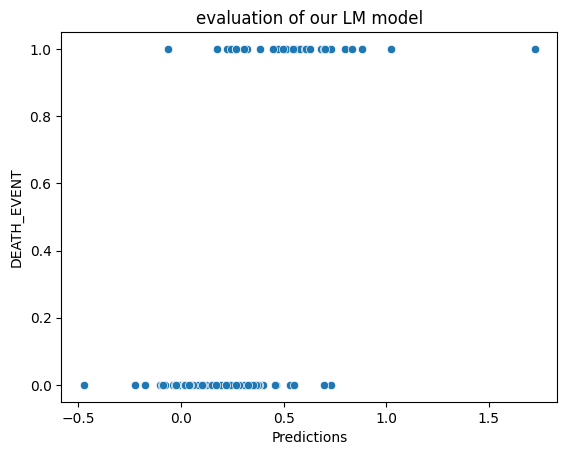

In [55]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.title('evaluation of our LM model')

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [57]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', math.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.34117532765693975
MSE: 0.17281770331062335
RMSE: 0.41571348704441063


# ***residuals***

In [58]:
residuals=y_test-predictions

In [59]:
residuals

,DEATH_EVENT
281,-0.196256
265,0.104819
164,0.769063
9,-0.723194
77,-0.272371
...,...
132,-0.221335
72,0.388922
15,0.372941
10,-0.025364


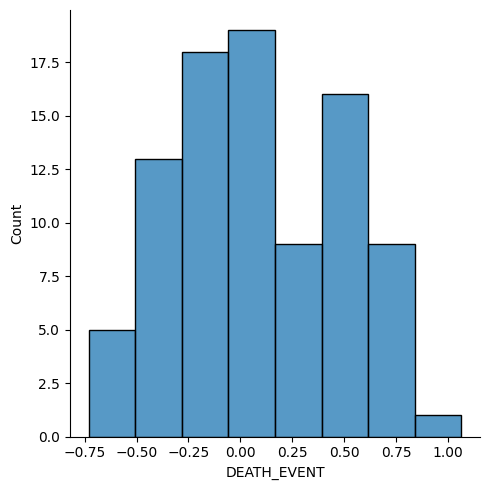

In [60]:
sns.displot(residuals)

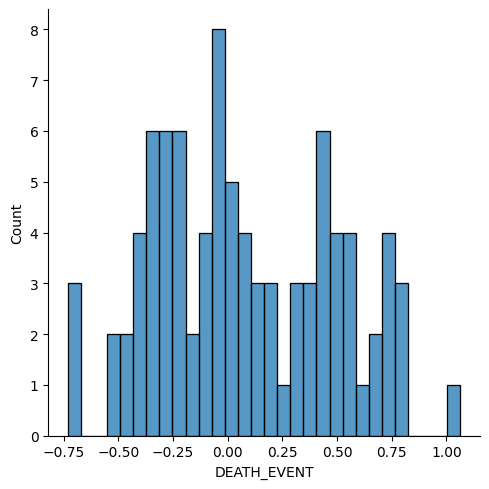

In [61]:
sns.displot(residuals, bins=30)

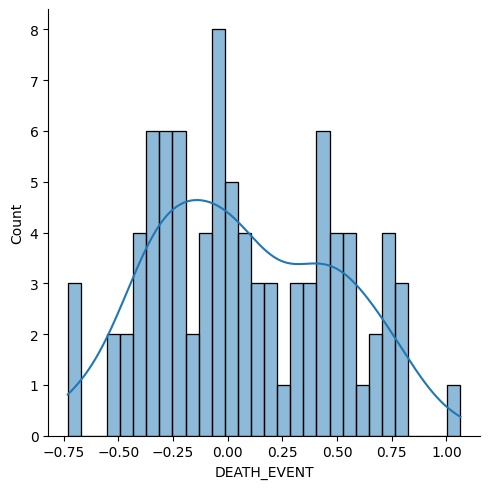

In [62]:
sns.displot(residuals, bins=30, kde=True)

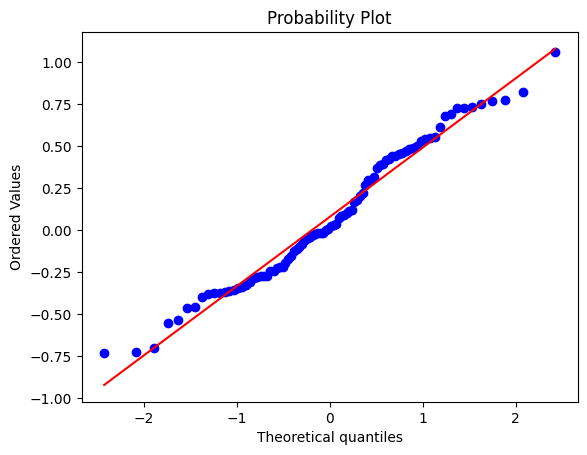

In [65]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()